<a href="https://colab.research.google.com/github/HoshimMardonov/Datasets/blob/main/Logistik_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/Rhtyme/ml_uz_book/main/practice_session/Logistic_regression_5_6/diabetes.csv")

Let's get acquainted with the database, that is, what columns there are, and what the data in them looks like, etc.

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This data set is based on data from the National Institute of Diabetes and Digestive and Kidney Diseases of the United States, and various analyzes in Native American women over 21 years of age, in particular, it expresses whether or not you have diabetes. There are 9 columns in the dataset, which can be described as follows:

*   Pregnancies - how many times a woman has been pregnant
*   Glucose - glucose oil
*   BloodPressure - blood pressure
*   SkinThickness - skin thickness
*   Insulin - measure of insulin
*   BMI - height and weight measurement (*kg/m2*)
*   Diabetes Pedigree Function - the coefficient of diabetes in the offspring
*   Age - age
*   Outcome - diabetes present (1) or absent (0)



Now let's get acquainted with the technical aspects of the data set, that is, in what format, the number of rows, etc.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As we can see, the dataset consists of 768 rows and each column is in different formats (int64 and float64). Let's apply this data set to mathematical operations, specifically the logistic regression process. In this case, we first convert to a numpy array for ease of calculation, choosing float64 as the column format.

In [56]:
df = np.array(df, dtype = float)

In [57]:
df.shape

(768, 9)

We extract the columns from the data set for the learning process, and load them into the X variable as an array. Note that the last column, the Outcome column, is not loaded into the training set because we load this column into a separate variable as an array of targets.

In [58]:
X = df[:, :8]
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [59]:
X[:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

We extract targets from the data set, and load them into the Y variable.

In [60]:
Y = df[:, 8:]

In [61]:
Y.shape

(768, 1)

In [62]:
Y[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]])

**Refinement of input variables - standardization**

Let's use the standardization method for smoothing the input variables, using the following formula:



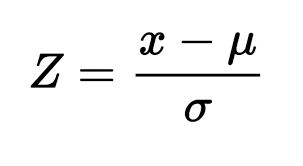

To find the arithmetic mean () and root mean square deviation () in the above formula, we use the *mean()* and *std()* functions in the numpy library and create a *feature_scaling* function that expresses this formula.

In [63]:
def feature_scaling(X):
  avg_array = np.mean(X,0)
  std_array = np.std(X,0)
  return np.divide(X - avg_array, std_array)

Let's scale the incoming variables using the feature_scaling function.

In [64]:
X = feature_scaling(X)

In [65]:
X[:10]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

For convenience in vertical calculations, let's add the vector *x* with the value *1* to the array *X*.

In [66]:
def add_bias(X):
  B = np.ones((X.shape[0], 1))
  return np.hstack((B,X))

In [67]:
X = add_bias(X)

In [68]:
X[:10]

array([[ 1.        ,  0.63994726,  0.84832379,  0.14964075,  0.90726993,
        -0.69289057,  0.20401277,  0.46849198,  1.4259954 ],
       [ 1.        , -0.84488505, -1.12339636, -0.16054575,  0.53090156,
        -0.69289057, -0.68442195, -0.36506078, -0.19067191],
       [ 1.        ,  1.23388019,  1.94372388, -0.26394125, -1.28821221,
        -0.69289057, -1.10325546,  0.60439732, -0.10558415],
       [ 1.        , -0.84488505, -0.99820778, -0.16054575,  0.15453319,
         0.12330164, -0.49404308, -0.92076261, -1.04154944],
       [ 1.        , -1.14185152,  0.5040552 , -1.50468724,  0.90726993,
         0.76583594,  1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 1.        ,  0.3429808 , -0.15318486,  0.25303625, -1.28821221,
        -0.69289057, -0.81134119, -0.81807858, -0.27575966],
       [ 1.        , -0.25095213, -1.34247638, -0.98770975,  0.71908574,
         0.07120427, -0.12597727, -0.676133  , -0.61611067],
       [ 1.        ,  1.82781311, -0.184482  , -3.57259724, -1

In [69]:
X.shape

(768, 9)

**Split the data into training/test sets**

Let's split the data set we have into training/test sets. In this case, the logistic regression we create will learn from the training dataset and test its performance from the test dataset. We use an 80/20 ratio for the training/test dataset split, which means we split 80% of the dataset into the training dataset and 20% into the test dataset.

In [70]:
rows, _ = X.shape

In [71]:
def split(X,Y):
  rows, _ = X.shape
  train_rows = round(rows * 0.8)
  test_rows = rows - train_rows
  return X[0:train_rows, :], X[train_rows:, :], Y[0:train_rows, :], Y[train_rows:, :]

In [72]:
X_train, X_test, Y_train, Y_test = split(X,Y)
print(f"X_train shape{X_train.shape}, \n"
      f"X_test shape{X_test.shape},\n" 
      f"Y_train shape{Y_train.shape},\n"
      f"X_test shape{Y_test.shape}")

X_train shape(614, 9), 
X_test shape(154, 9),
Y_train shape(614, 1),
X_test shape(154, 1)


**Initialization of coefficients** <br>
Recall the formula for logistic regression:

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScSqqRKLX0WDaBP41dXYxcq6eoDUtDIRaeEA&usqp=CAU" width='200'/>

So we have 8 columns. But we initialize 9 parameters (including a).
Recall that x is a vectorized representation of the function. <br>

$ x = X A^T $

In [73]:
A = np.random.rand(X.shape[1], 1)
A.shape

(9, 1)

In [74]:
A

array([[0.81346662],
       [0.23897704],
       [0.94421145],
       [0.58630142],
       [0.3443402 ],
       [0.27740954],
       [0.94935313],
       [0.82526256],
       [0.80322738]])

**Logistic regression function**
Now that we've defined the variables for the coefficients, let's define the function. Let's call this function *logistic_regression_function()* 

In [75]:
def Logistic_regression_function(X,A):
  Z = np.dot(X,A)
  return 1 / (1 + np.exp(-Z))

**Value function and Gradient descent**

In [76]:
def cost(X,A,Y):
  m = Y.shape[0]
  F_x = Logistic_regression_function(X,A)
  cost_ = -np.sum(Y * np.log(F_x) + (1-Y) * np.log(1 - F_x)) / m
  return cost_

In gradient descent, we find the parameters that minimize the above value function. In this case, we need to repeat the following expression for each parameter for a given row:

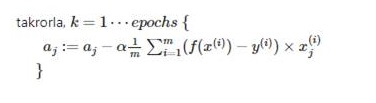

Let's define a number of hyperparameters in the loop implementation above:

*    We set the value of the number of steps to **500** and store it in the *epochs* variable.
*   Let's set the learning rate to **0.1** and store it in the *learning_rate* variable

At each step, we calculate the value for the training and test set and store them in the *train_costs* and *test_costs* arrays, respectively.

In [77]:
epochs = 500
learning_rate = 0.1

We create a function that performs **gradient descent** and name it *gradient_descent*

In [80]:
def gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs):
  train_costs = []
  test_costs = []
  m_train = Y_train.shape[0]
  m_test = Y_test.shape[0]
  for k in range(epochs):
    F_x = Logistic_regression_function(X_train, A)
    A = A - learning_rate * np.dot(X_train.T, (F_x - Y_train)) / m_train
    cost_train_ = cost(X_train, A, Y_train)
    cost_test_ = cost(X_test, A, Y_test)
    train_costs.append(cost_train_)
    test_costs.append(cost_test_)
    if k % 20 == 0:
      print('epoch: %d, %f'% (k, cost_train_))
  return A, train_costs, test_costs

Let's do gradient descent, we'll use the gradient_descent function we created, and this function will perform **gradient descent** and return the **arrays** *train_costs*, *test_costs* representing the optimal value found for the variable A and the value function for the training and test sets at each step.

In [81]:
A, train_costs, test_costs = gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs)

epoch: 0, 0.810780
epoch: 20, 0.664596
epoch: 40, 0.572698
epoch: 60, 0.521186
epoch: 80, 0.495059
epoch: 100, 0.482440
epoch: 120, 0.476288
epoch: 140, 0.473138
epoch: 160, 0.471418
epoch: 180, 0.470419
epoch: 200, 0.469808
epoch: 220, 0.469417
epoch: 240, 0.469158
epoch: 260, 0.468983
epoch: 280, 0.468861
epoch: 300, 0.468775
epoch: 320, 0.468714
epoch: 340, 0.468669
epoch: 360, 0.468637
epoch: 380, 0.468613
epoch: 400, 0.468595
epoch: 420, 0.468582
epoch: 440, 0.468572
epoch: 460, 0.468565
epoch: 480, 0.468559


To visually see how much the cost function changes on the gradient descent, let's create a graph function *plot_cost*, which draws a graph using the matplotlib library.

In [85]:
def plot_cost(train_costs, test_costs, epochs):
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.plot(epochs, train_costs, 'm', linewidth = '1', color='r', label="error in exercise")
  plt.plot(epochs, test_costs, 'm', linewidth = '1', color='g', label="error in test")
  plt.legend(loc="upper right")
  plt.show()

The plot_cost function accepts 3 array variables as parameters and these are:
*   an array representing the result of the value function for the training set, the train_costs variable
*   an array representing the result of the value function for the test set, the test_costs variable
*   array representing epochs, variable epochs

In [86]:
n_epochs = np.arange(1, epochs + 1)
n_train_costs = np.array(train_costs)
n_text_costs = np.array(test_costs)

Let's graphically represent the change of the cost function at each step using the plot_cost function.

<ipython-input-85-e73fd0a254c4>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_costs, 'm', linewidth = '1', color='r', label="error in exercise")
<ipython-input-85-e73fd0a254c4>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(epochs, test_costs, 'm', linewidth = '1', color='g', label="error in test")


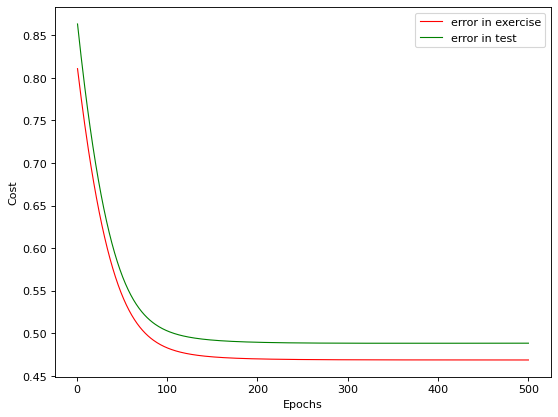

In [87]:
figure(figsize=(8,6), dpi=80)

plot_cost(train_costs, test_costs, n_epochs)

From the graph above, we can see that the error is decreasing at each step in both the training set and the test set. From this we can conclude that the logistic regression we created is working correctly.

<h1>Decision boundary</h1>

The output of the logistic regression we created lies in the interval (0,1), meaning it outputs non-integer numbers. And our tokens are integers with values of 0 or 1. Specifically, let's calculate the logistic regression for the test set and print the first 10 items:

In [88]:
test_predictions = Logistic_regression_function(X_test, A)
test_predictions[:10, :]

array([[0.748403  ],
       [0.08682772],
       [0.16583562],
       [0.01445517],
       [0.50116513],
       [0.27669705],
       [0.20931536],
       [0.16788818],
       [0.96520246],
       [0.2049188 ]])

To convert the above numbers **0** and **1** to integers, let's create a function that implements a decision boundary. In this case, we choose **0.5** as a limit, that is, we accept numbers greater than **0.5** as **1**, and numbers equal to and smaller than **0.5** as **0**. In order for the function we created to work with arrays, we will process this function using the *vectorize* function of the **numpy** library.

In [89]:
def db_function(prediction):
  if prediction > 0.5:
    return 1 
  else:
    return 0
db_function = np.vectorize(db_function)

In [90]:
test_predictions = db_function(test_predictions)
test_predictions[:10, :]

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]])

<h1><b>Model accuracy<b></h1>

To evaluate the accuracy of the model we created, let's calculate the Accuracy and F1-Score metrics. Before calculating these measurements, let's define a few auxiliary measurements, namely:
*   True Positive - TP
*   True Negative - TN
*   False Positive - FP
*   False Negative - FN

Let's create a function that calculates the auxiliary dimensions above:

In [95]:
def calculate_helper_vars(predicted, actual):
  n = actual.shape[0]
  predicted = predicted.reshape(-1, actual.shape[1])
  tp = np.count_nonzero((predicted == actual) & (predicted == 1))
  tn = np.count_nonzero((predicted == actual) & (predicted == 0))
  fp = np.count_nonzero((predicted != actual) & (predicted == 1))
  fn = np.count_nonzero((predicted != actual) & (predicted == 0))
  return tp, tn, fp, fn, n

Let's calculate the helper dimensions using the *calculate_helper_vars* function:

In [96]:
tp, tn, fp, fn, n = calculate_helper_vars(test_predictions, Y_test)

In [97]:
print(tp, tn, fp, fn, n)

30 89 10 25 154


In [98]:
(tp + tn) / n

0.7727272727272727

Let's calculate the following metrics that estimate the model using auxiliary metrics:

*   *Accuracy* is the simplest method of model accuracy.
*   *Precision* is the ratio of correctly predicted positive values to the total number of positive predicted values.
*   *Recall* (Sensitivity) is the ratio of correctly predicted positive values to all true positive targets in the data set.
*   *The F1 Score* is a measure of Precision and Recall that gives a clearer picture of model accuracy.

We create a function called *calc_metrics* for calculation:

In [101]:
def calc_metrics(tp,tn, fp, fn, n):
  accuracy = (tp + tn) / n
  precision = tp / (tp +fp)
  recall = tp / (tp + fn)
  f1_score = 2 * (recall * precision) / (recall + precision)
  return accuracy, precision, recall, f1_score

Let's run the *calc_metrics* function:

In [102]:
accuracy, precision, recall, f1_score = calc_metrics(tp, tn, fp, fn, n)
print('accuracy: %f, precision: %f, recall: %f, f1_score: %f'% (accuracy, precision, recall, f1_score))

accuracy: 0.772727, precision: 0.750000, recall: 0.545455, f1_score: 0.631579


We can draw the following conclusions about the model from the measurements:
*   our model found 77% of the 154 items in the test set (accuracy)
*   75% of targets predicted by model 1 were found correctly (precision)
*   54% of targets in test set 1 were correctly detected by the model
*   F1 score is 0.63, we can call this measure a comparative measure. Because   it is usually through these measurements that the accuracy of different models is compared to each other.

Judging from the results of the measurements, we can say that the accuracy of the model is good, and it can certainly be improved further.